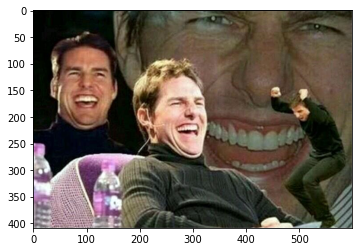

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib


my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/laugh.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [22]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    bb_coordinate=cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    

rectangles[[(44, 92) (151, 199)], [(235, 140) (342, 247)]]


[(235, 140) (342, 247)]


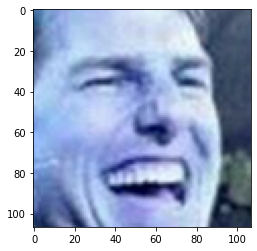

In [23]:
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
# crop = img_bgr[dlib_rect.left():dlib_rect.right(), dlib_rect.left():dlib_rect.right()]
crop = img_bgr[dlib_rect.top():dlib_rect.bottom(), dlib_rect.left():dlib_rect.right()]
plt.imshow(crop)

print(dlib_rect)


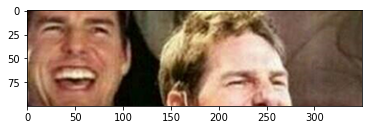

In [24]:
#crop = img_bgr[[344, 434],dlib_rect.top():dlib_rect.bottom()]
#print(dlib_rect.left())
#print(dlib_rect.right())
#print(dlib_rect.top())
#print(dlib_rect.bottom())

#print(type(dlib_rect.left()))

#plt.imshow(crop)

# 480을 넘어가면 오류가 뜨는데 이는 이미지가 480x480이라서 그런거 같다
# 이미지가 왜 이렇게 출력 되는지 전혀 모르겠다


# 조원분들의 설명 덕분에 해결
# 슬라이싱을 top:bottom, left:right 로 하면 됨
# 이때 dlib 로 만든 bounding box는 bottom, left를 가장 처음 인지하므로,
# .left() .righ() .top .bottom 쓸 때 참고하자


plt.imshow(img_rgb[100:200, 50:400])
# plt 이미지 객체는 슬라이스로 자를 수 있다

In [25]:
print(dlib_rects)


rectangles[[(44, 92) (151, 199)], [(235, 140) (342, 247)]]


2
68


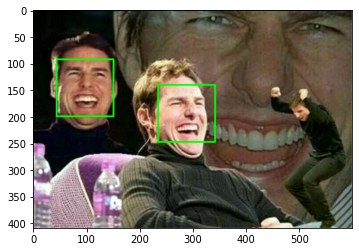

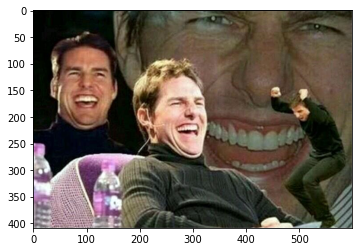

In [26]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks))
print(len(list_landmarks[0]))

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

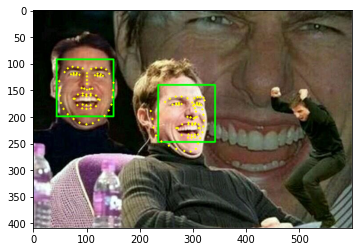

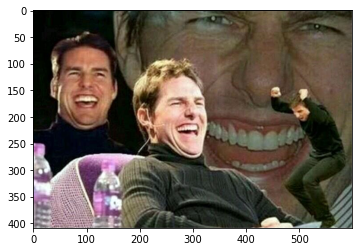

In [27]:
# 랜드마크 이미지 출력

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

(101, 149)
108 108
(x,y) : (47,77)
(x,y) : (47,77)
(302, 203)
108 108
(x,y) : (248,131)
(x,y) : (248,131)
스티커 x, y, h, w [[47, 77, 108, 108], [248, 131, 108, 108]]


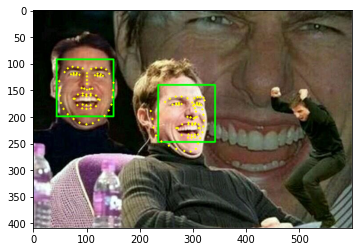

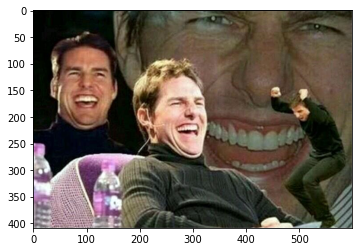

In [28]:
sticker_path = os.getenv('HOME')+'/aiffel/ex_/cat.png'
img_sticker = cv2.imread(sticker_path)
# img_sticker = 255-img_sticker

ap = []
i = 0

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    print(landmark[33])
    print(dlib_rect.height(), dlib_rect.width())
    x = landmark[33][0]
    y = landmark[33][1] + dlib_rect.height()//3
    w = h = dlib_rect.width()
    img_sticker = cv2.resize(img_sticker, (w,h))
    # 만약 가로세로 길이가 다른 스티커일 경우 스티커가 찌부되거나 짤리겠네
    refined_x = x - w // 2
    refined_y = y - h
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
    
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0

    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    ap.append([refined_x, refined_y, w, h])
    
    i += 1


print('스티커 x, y, h, w', ap)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

[[47, 77, 108, 108], [248, 131, 108, 108]]
[[47, 77, 108, 108], [248, 131, 108, 108]]


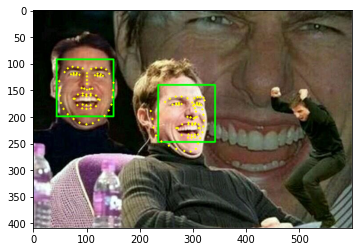

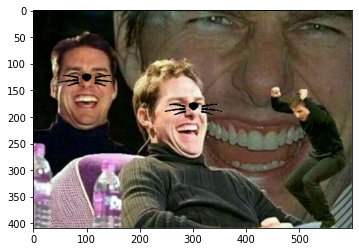

In [52]:
for i in ap:
    print(ap)
    refined_x = i[0]
    refined_y = i[1]
    
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

2
77
47


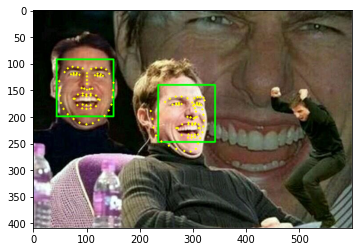

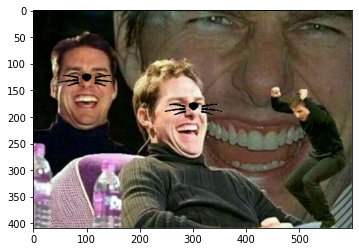

In [29]:
# for문으로 코드 길이를 줄이기 전 코드
# 덕분에 일일히 변수로 지정할 필요가 없어짐


"""

print(len(ap))

print(ap[0][1])
print(ap[0][0])



refined_x_1 = ap[0][0]
refined_y_1 = ap[0][1]
refined_x_2 = ap[1][0]
refined_y_2 = ap[1][1]
refined_x_3 = ap[2][0]
refined_y_3 = ap[2][1]
refined_x_4 = ap[3][0]
refined_y_4 = ap[3][1]
refined_x_5 = ap[4][0]
refined_y_5 = ap[4][1]

sticker_area = img_bgr[refined_y_1:refined_y_1+img_sticker.shape[0], refined_x_1:refined_x_1+img_sticker.shape[1]]
img_bgr[refined_y_1:refined_y_1+img_sticker.shape[0], refined_x_1:refined_x_1+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y_2:refined_y_2+img_sticker.shape[0], refined_x_2:refined_x_2+img_sticker.shape[1]]
img_bgr[refined_y_2:refined_y_2+img_sticker.shape[0], refined_x_2:refined_x_2+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

sticker_area = img_bgr[refined_y_3:refined_y_3+img_sticker.shape[0], refined_x_3:refined_x_3+img_sticker.shape[1]]
img_bgr[refined_y_3:refined_y_3+img_sticker.shape[0], refined_x_3:refined_x_3+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
sticker_area = img_bgr[refined_y_4:refined_y_4+img_sticker.shape[0], refined_x_4:refined_x_4+img_sticker.shape[1]]
img_bgr[refined_y_4:refined_y_4+img_sticker.shape[0], refined_x_4:refined_x_4+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
sticker_area = img_bgr[refined_y_5:refined_y_5+img_sticker.shape[0], refined_x_5:refined_x_5+img_sticker.shape[1]]
img_bgr[refined_y_5:refined_y_5+img_sticker.shape[0], refined_x_5:refined_x_5+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)




plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

"""

In [43]:
# 최종 이미지는 셀카 이미지 위에 투명도가 적용된 이미지가 덮어씌워져야 된다
img1 = img_rgb
img2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#print(img1.shape)
#print(img2.shape)

# 아래 기능을 쓰기 전에 조건이 있다
# img1 과 img2의 크기가 같아야 된다
# 즉 스티커를 적용하기 전 사진을 img1
# 스티커를 적용한 사진을 img2 로 설정해둬야 된다

cv2.imwrite('add_sticker.png',img2)

True

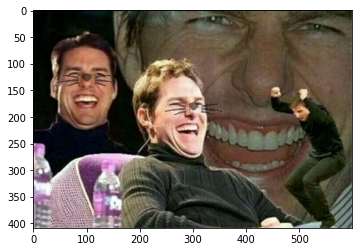

In [49]:
dst = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(dst)

이번 프로젝트는 노드에 설명이 친절하게 서술되어 있어 편하기도 했고,
딥러닝 모델을 직접 만들고 훈련하는 과정이 생략되어 있어 편했던 거 같습니다
덕분에 노드에서 지시한 프로젝트를 변형할 수 있었고,
opencv에 대해 좀 더 알게 된 계기가 되었습니다

저는 딥러닝 모델을 직접 만드는 능력도 분명 필요하다 생각하지만,
직접 딥러닝 모델을 만들게 되면 유지보수를 꾸준히 해줘야 된다는 점이 부담이 되더군요

때문에 저는 이런식으로 이미 만들어져있고, 유지보수도 해주는 딥러닝 모델을 이용하는 프로젝트가 더 많아졌으면 좋겠다라는 작은 소망을 가져봅니다

궁금한 점
:
왜 절대 경로 대신 상대 경로를 쓰는지?
또 상대 경로를 쓰는 방법이 인터넷에서 찾을 수 있는 방법과는 좀 다른데 이유가 있는건지 궁금합니다

이번 프로젝트를 하면서 여러 시도를 해봐봤는데,
대부분 실패했습니다
더 큰 문제는 왜 안돼는지도 모르겠습니다
addweight 함수를 써서 이미지를 합성한 다음,
합성 이미지를 출력할 때 인터넷에서 찾은 코드로는 ('dst', dst) 이런식으로 출력하는데,
저는 그냥 (dst)로 해야만 에러가 안 뜨고 출력 되더군요

솔직히 모혼한 것들이 너무 많지만, 프로젝트를 진행하면서 내가 모호했던 게 뭐였지? 하며 까먹게 되더군요
다음부터는 모호한게 있으면 따로 적어놔야 될 거 같습니다
+
인터넷에서 찾은 코드는 아직 제 능력이 부족해서 그런지 대부분 활용하지 못하고 해석만 하고 넘어가게 되었는데,
이로써 기초가 얼마나 중요한가를 다시 한 번 느끼게 되었습니다
+
그리고 print가 안되는 객체를 어떻게 출력해야 되는지 좀 고민해봐야 될 거 같습니다